<a href="https://colab.research.google.com/github/tolossamuel/Linear-Regrassion/blob/main/day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

load the data sets

# **Task**: form the data set of black friday creat model that is eable to predict the purchise capacity of the costomers

In [4]:
test_data = "drive/MyDrive/EDA/Day2/archive/test.csv"
test_df = pd.read_csv(test_data)

In [5]:
path = "drive/MyDrive/EDA/Day2/archive/train.csv"
data = pd.read_csv(path)

In [6]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**EDA, FEATURE ENGINEERING DATA CLEANING AND PREPARE THE DATA FOR THE MODE**

In [7]:
# concatinet the data
df = pd.concat([data,test_df])

In [8]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [14]:
# df.drop(["User_ID"], axis = 1, inplace = True)

In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [17]:
df.shape

(783667, 11)

change the catagorical data to numerical **values**

In [19]:
# df["Gender"] = df["Gender"].map({"F":1,"M":0})


In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [22]:
# from sklearn import preprocessing
# lable_encoder = preprocessing.LabelEncoder()
# df["Age"] = lable_encoder.fit_transform(df["Age"])



In [23]:
# prompt: df_city = pd.get_dummies(df["City_Category"], drop_first = True) this give as true and fales value but i wanna 0 and 1

df_city = pd.get_dummies(df["City_Category"], drop_first = True).astype(int)


In [24]:
df_city = pd.get_dummies(df["City_Category"], drop_first = True).astype(int)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [25]:
# df = pd.concat([df,df_city],axis = 1)

In [26]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [27]:
# df.drop(["City_Category"], axis = 1, inplace = True)

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,6,16,4+,0,8,NaN,NaN,7969.0,0,1


In [29]:
df["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: count, dtype: int64

In [30]:
df["Product_Category_2"].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [31]:
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [32]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [33]:
df.isnull().sum()


Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [34]:
df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [35]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [36]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [37]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace("+","")

In [38]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [39]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


In [44]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,6,16,4,0,8,8.0,16.0,7969.0,0,1


<Axes: xlabel='Age', ylabel='Purchase'>

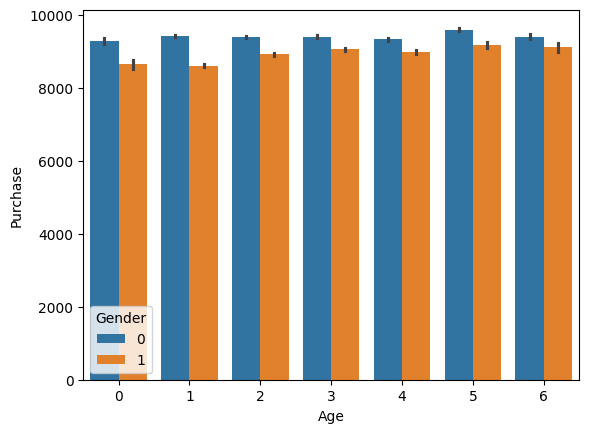

In [46]:
sns.barplot(x = "Age", y = "Purchase", hue = "Gender", data = df)

In [47]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,6,16,4,0,8,8.0,16.0,7969.0,0,1


<Axes: xlabel='Occupation', ylabel='Purchase'>

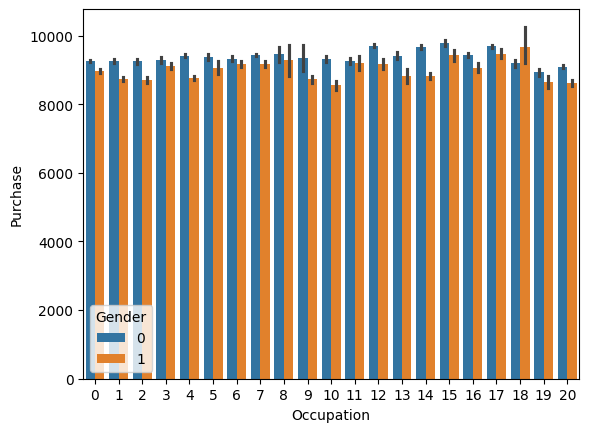

In [48]:
sns.barplot(x = "Occupation", y = "Purchase", hue = "Gender", data = df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

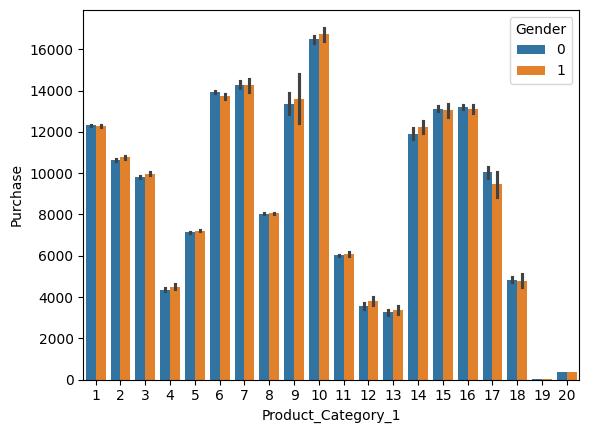

In [49]:
sns.barplot(x = "Product_Category_1", y = "Purchase", hue = "Gender", data = df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

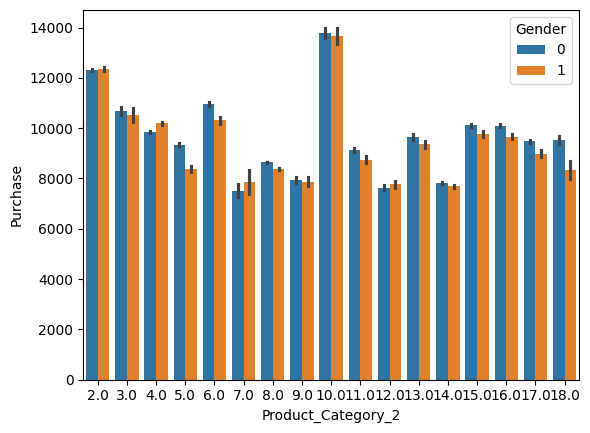

In [50]:
sns.barplot(x = "Product_Category_2", y = "Purchase", hue = "Gender", data = df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

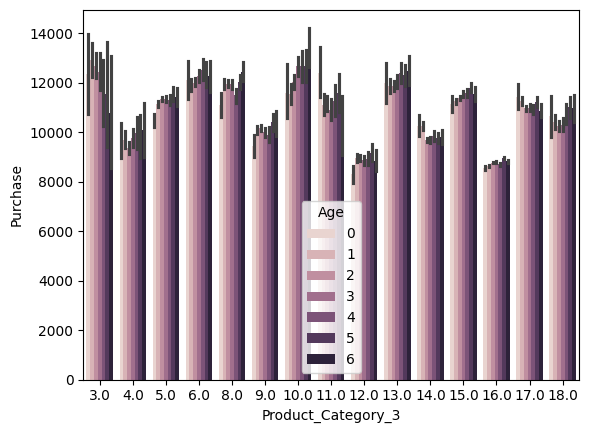

In [52]:
sns.barplot(x = "Product_Category_3", y = "Purchase", hue = "Age", data = df)

In [61]:
df_copy = df.copy()
df.drop(["Product_ID"], inplace = True,axis = 1)

In [62]:
# split test data and train data

df_test = df[df["Purchase"].isnull()]

In [63]:
df_train = df[(~df["Purchase"].isnull())]

In [64]:
# splite the data
X = df_train.drop(["Purchase"], axis = 1)
Y = df_train["Purchase"]

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)